<a href="https://colab.research.google.com/github/mihir0804/DataScience/blob/main/Case_Study_02_Bank_TeleMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np
# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Importing Data using Pandas Function
df = pd.read_csv('bank.csv')
# if file csv uplond in
# It will print Shuffle 100% Dataset
df.sample(frac = 1)
# df.head() # it will print top five rows
# df.tail() # it will print bottom five rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1868,42,management,married,primary,no,-679,yes,yes,cellular,6,may,159,1,343,2,failure,no
2924,49,blue-collar,married,secondary,no,2039,yes,no,cellular,6,may,451,1,169,2,failure,yes
3085,60,self-employed,single,secondary,no,27,no,no,cellular,22,aug,40,2,-1,0,unknown,no
322,60,self-employed,single,tertiary,no,179,no,yes,cellular,29,jul,79,4,-1,0,unknown,no
915,33,management,married,secondary,no,4040,yes,no,cellular,20,apr,132,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,45,services,divorced,secondary,no,-179,no,no,unknown,3,jul,155,2,-1,0,unknown,no
1218,54,unknown,married,unknown,no,2508,no,no,unknown,20,jun,34,8,-1,0,unknown,no
2321,27,services,single,secondary,no,54,yes,no,unknown,28,may,543,2,-1,0,unknown,yes
4208,39,technician,married,secondary,no,626,yes,no,cellular,11,may,126,2,-1,0,unknown,no


In [47]:
# Problem Definition:
'''
This dataset belongs to Portugal Bank Telemarketing.Where our aim is to predict where the client will subscribe to a term deposit or not. Hence 'y' will be act as target Column or dependent column whereas other columns are independent columns.

x = independent columns
y = dependent columns / Target Column

'''
# Checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<Axes: >

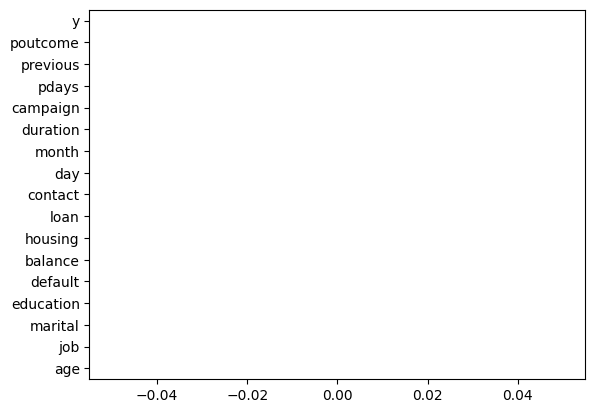

In [48]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the coloumn
df.isnull().sum().plot(kind = 'barh') # First Method

<Axes: >

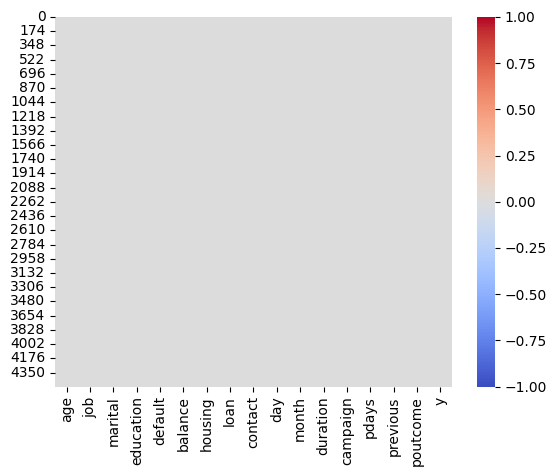

In [49]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the coloumn
sns.heatmap(df.isnull(),cmap='coolwarm',vmin=-1,vmax=1,center =0)
# Second Method

<Axes: >

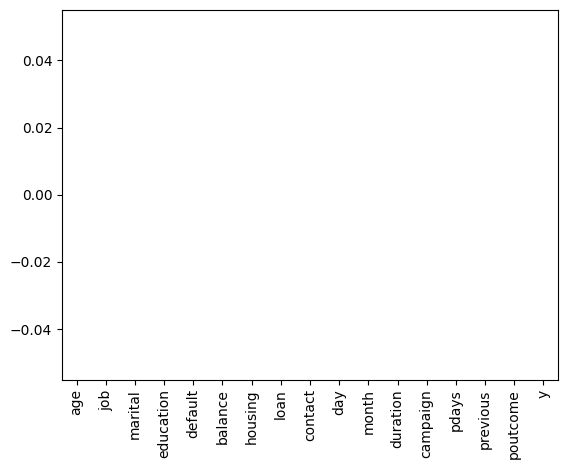

In [50]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the coloumn
df.isnull().sum().plot(kind = 'bar',cmap = 'viridis') # Third Method

In [51]:
# Split the Dataset Into Categorical and Numerical

categorical_col = df.select_dtypes(include ='object')
categorical_col

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [52]:
numerical_col = df.select_dtypes(exclude ='object')
numerical_col

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [53]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


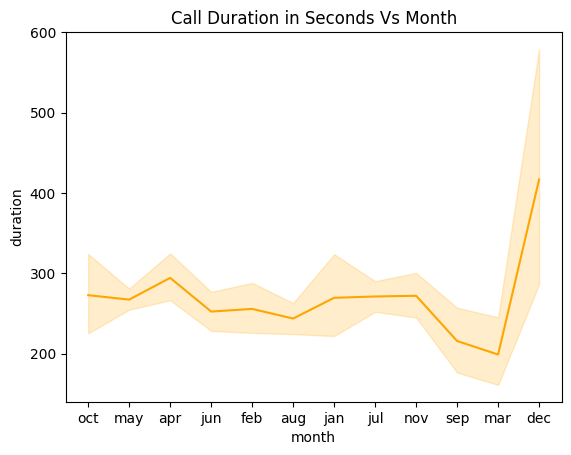

In [54]:
sns.lineplot(x =df['month'], y =df['duration'], c='orange')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

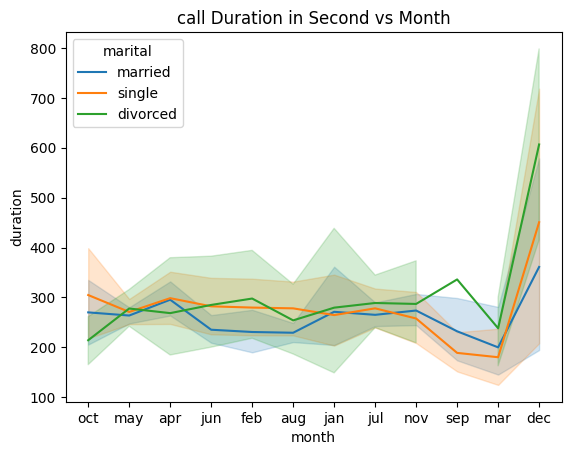

In [55]:
sns.lineplot(x = df['month'], y = df ['duration'],c = 'Red' ,hue = df['marital'])
plt.title('call Duration in Second vs Month')
plt.show()

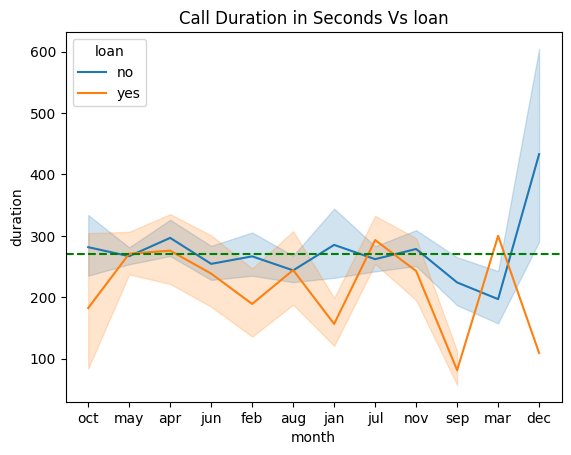

In [56]:
sns.lineplot(x =df['month'], y =df['duration'],hue =df['loan'])
plt.title('Call Duration in Seconds Vs loan')
plt.axhline(270,linestyle ='--', c='green')
plt.show()

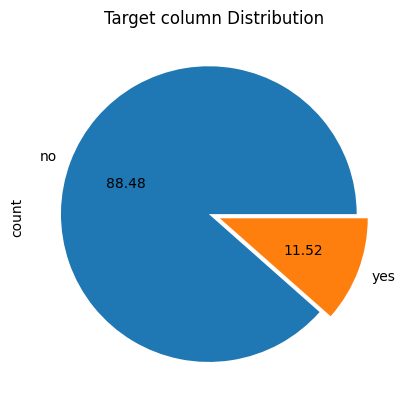

In [57]:
df['y'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.04,0.04])
plt.title('Target column Distribution')
plt.show()

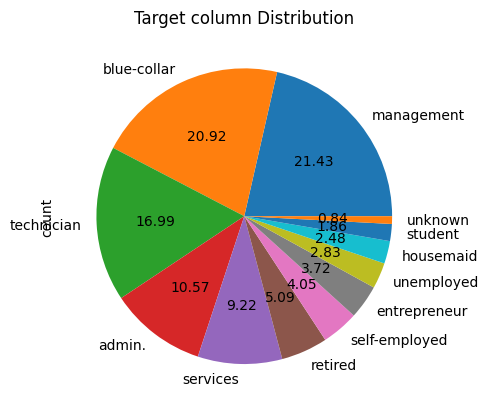

In [58]:
df['job'].value_counts().plot(kind = 'pie',autopct = '%1.2f')
plt.title('Target column Distribution')
plt.show()

In [59]:
management_job=df[(df['job'] == 'management') & (df['y'] == 'yes')]

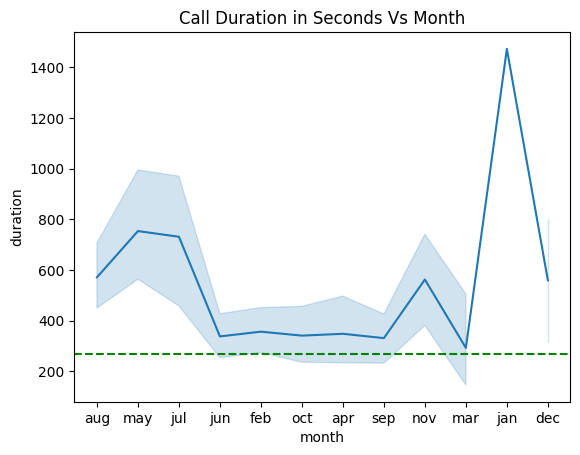

In [60]:
sns.lineplot(x =management_job['month'], y =management_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [61]:
bluecoller_job= df[(df['job'] == 'blue-collar') & (df['y'] == 'yes')]

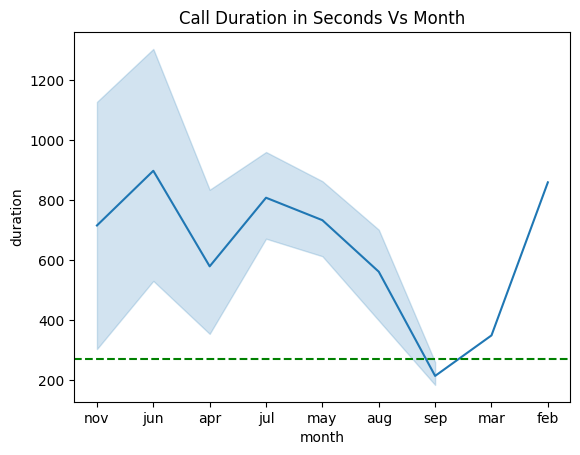

In [62]:
sns.lineplot(x =bluecoller_job['month'], y =bluecoller_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [63]:
technician_job= df[(df['job'] == 'technician') & (df['y'] == 'yes')]

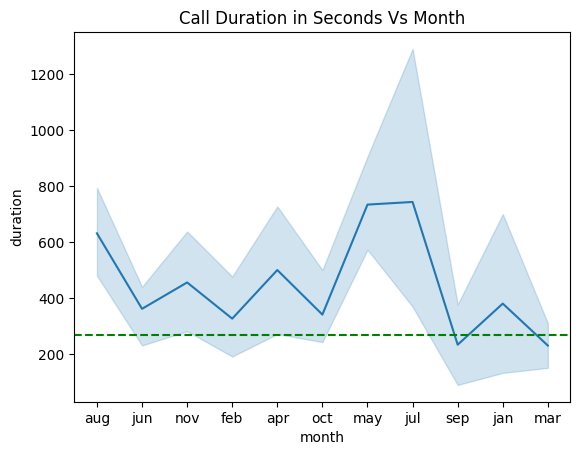

In [64]:
sns.lineplot(x =technician_job['month'], y =technician_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [65]:
admin_job= df[(df['job'] == 'admin') & (df['y'] == 'yes')]

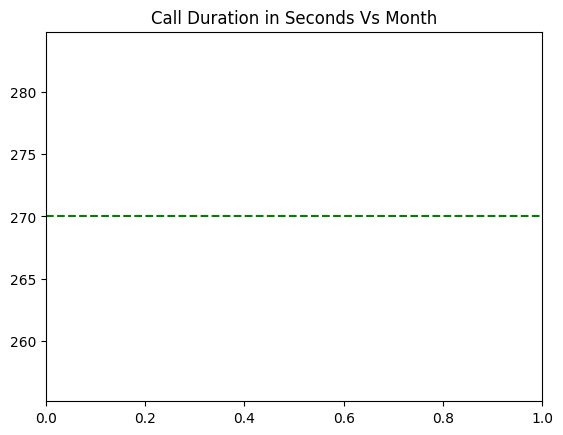

In [66]:
sns.lineplot(x =admin_job['month'], y =admin_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [67]:
services_job= df[(df['job'] == 'services') & (df['y'] == 'yes')]

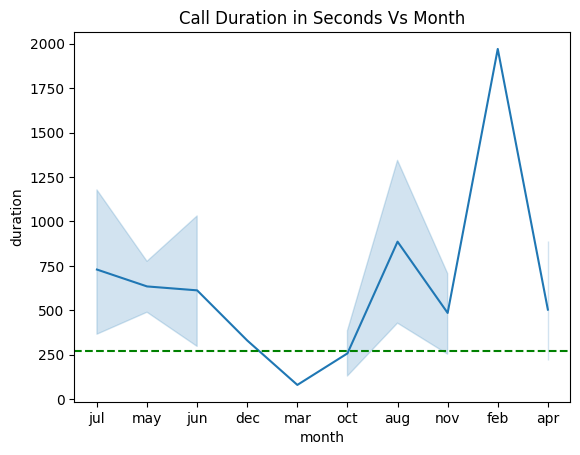

In [68]:
sns.lineplot(x =services_job['month'], y =services_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [69]:
df[df['job'] == 'admin.'].agg(['mode'])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode
0,34.0,admin.,married,secondary,no,0.0,yes,no,cellular,20.0,may,77,1.0,-1.0,0.0,unknown,no
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN


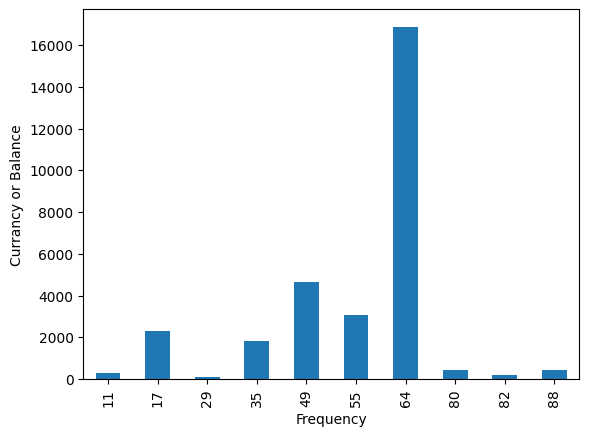

In [70]:
df[df['job'] == 'admin.'] ['balance'][:10].plot(kind = 'bar') # First Method
plt.xlabel('Frequency')
plt.ylabel('Currancy or Balance')
plt.show()

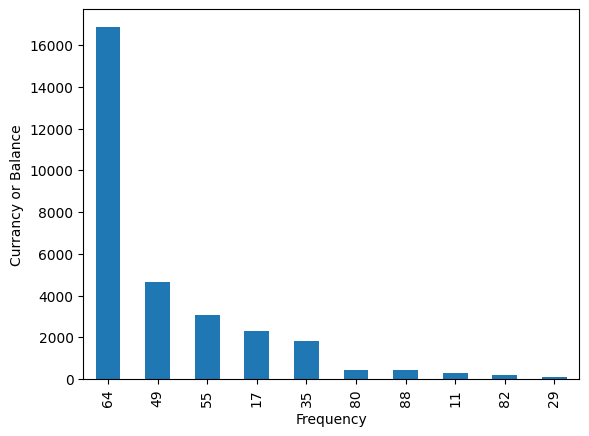

In [71]:
df[df['job'] == 'admin.'] ['balance'][:10].sort_values(ascending= False).plot(kind = 'bar') # Second Method
plt.xlabel('Frequency')
plt.ylabel('Currancy or Balance')
plt.show()

In [72]:
divorced=df[(df['marital'] == 'divorced') & (df['y'] == 'yes')]

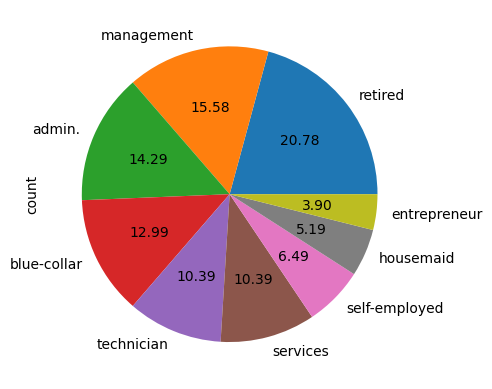

In [73]:
divorced['job'].value_counts().plot(kind ='pie',autopct = '%1.2f')

plt.show()

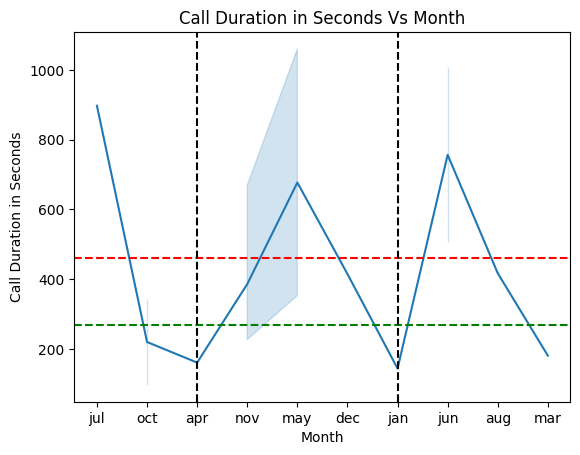

In [74]:
divorced_retired =divorced[divorced['job'] == 'retired']

sns.lineplot(x =divorced_retired['month'], y =divorced_retired['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.axhline(divorced_retired['duration'].mean(),linestyle ='--', c='red')
plt.xlabel('Month')
plt.ylabel('Call Duration in Seconds')
plt.axvline('apr',linestyle ='--', c='black')
plt.axvline('jan',linestyle ='--', c='black')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

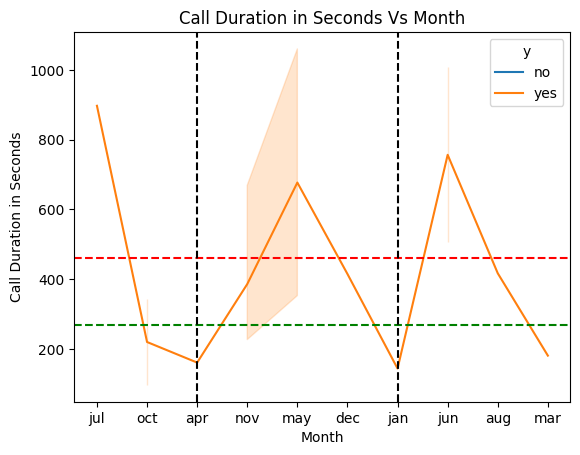

In [75]:
divorced_retired =divorced[divorced['job'] == 'retired']

sns.lineplot(x =divorced_retired['month'], y =divorced_retired['duration'],hue=df['y'])
plt.axhline(270,linestyle ='--', c='green')
plt.axhline(divorced_retired['duration'].mean(),linestyle ='--', c='red')
plt.xlabel('Month')
plt.ylabel('Call Duration in Seconds')
plt.axvline('apr',linestyle ='--', c='black')
plt.axvline('jan',linestyle ='--', c='black')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [76]:
divorced=df[(df['marital'] == 'divorced') & (df['y'] == 'no')]

In [77]:
# Univariate Analysis
'''
step 1 : Create a blank list
step 2 : create a dictionary
step 3 : append list containing disctionary key and value pair
step 4 : Convert list into Dataframe
'''
'''
Note:
If Any column in Datasets shows IQR as Zero such column must be dropped fromo the
dataset.

IQR = Inter quartile Range : Q3 - Q1

'''
from collections import OrderedDict

stats = []

for i in numerical_col.columns:
  numerical_stats = OrderedDict({
      'Feature':i,
      'count':df[i].count(),
      'Minimum':df[i].min(),
      'Maximum':df[i].max(),
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
      'Kertosis':df[i].kurt(),
      'Skewness':df[i].skew()
  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)
report

,Feature,count,Minimum,Maximum,Mean,Median,Q1,Q3,IQR,Kertosis,Skewness
0,age,4521,19,87,41.170095,39.0,33.0,49.0,16.0,0.348775,0.699501
1,balance,4521,-3313,71188,1422.657819,444.0,69.0,1480.0,1411.0,88.390332,6.596431
2,day,4521,1,31,15.915284,16.0,9.0,21.0,12.0,-1.039531,0.094627
3,duration,4521,4,3025,263.961292,185.0,104.0,329.0,225.0,12.530050,2.772420
4,campaign,4521,1,50,2.793630,2.0,1.0,3.0,2.0,37.168920,4.743914
5,pdays,4521,-1,871,39.766645,-1.0,-1.0,-1.0,0.0,7.957128,2.717071
6,previous,4521,0,25,0.542579,0.0,0.0,0.0,0.0,51.995212,5.875259


In [78]:
# Encoding Technique
'''
step 1 : converting Categorical column to Numerical columns
step 2 : Use label Encoder or One Hot Encoder

'''

# create copy of dataframe: df
data = df.copy()

data = pd.get_dummies(data,drop_first = True,dtype = 'int')
data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [79]:
'''
Note:
1. All Independent Columns are decoded or encoded using concept of label encode
or one hot encoder but target column must be encoded separetly using replace
function or map function.
2. In the above dataset we find that 'y' is acts as target column where as other
than 'y' column are termed as Independent columns.

'''

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['job'] = le.fit_transform(df['job'])
df['marital'] = le .fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])

# Encoding Target Column Separately
df['y'] = df['y'].replace({'yes':1,'no':0})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [80]:
df.drop(columns = ['pdays','previous'],axis = 1,inplace = True)

In [81]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,1,0


In [82]:
df['y'].value_counts()

,count
y,
0,4000
1,521


In [83]:
# 1. Understanding Scaling Technqiue
# 2. Data leakkage and how to prevent the same
# 3. How to balance target column : Three Stratergies

'''
# step 1 : split the dataset into x & y
          x:= independent columns
          y: Dependent columns / Target column

# step 2 : Use Train Test Split:
           Always Split the dataset into seen and unseen data
           seen data : Train Data : 70 % to 80 %
           Useen Data : Test Data : 30 % to 20 %
           Test Size must be between 0.20 to 0.30

# step 3 : Try Balance the Target column using imblearn technique
          Imblearn techniques(scikit learn library):
          1. Oversampling Technique
          2. Undersampling Technique

# step 4 :Using Scaling Technique :
          Mean != Median : Non Normal Distribution
          Mean = Median : Normal Distribution

          Scaling Techniques:
          1.MinMax Scaler : When the dataset is Non Normal distributed
          2.Standard Scaler : when the dataset is Normal distributed
          3.Robust Scaler : When the dataset has more outliers and became of
          which the Machine learning Model become more sensative.

'''

# Step 1 : Split the Dataset Into X and y
from sklearn.model_selection import train_test_split

# Independent Columns
X = df.drop(columns=['y'],axis = 1)
# Dependent Column
y = df['y']

# Step 2 : Use Train Test Split:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# Step 3 : Balance Technique : Undersampling Technique
from imblearn.under_sampling import ClusterCentroids,AllKNN
# Balance Technique : Oversampling Technique
from imblearn.over_sampling import RandomOverSampler,ADASYN,SMOTE

#sampling = ClusterCentroids()
#sampling = RandomOverSampler()
#sampling = ADASYN
sampling = SMOTE()

X_train,y_train = sampling.fit_resample(X_train,y_train)

print(y_train.value_counts()) # This shows the Dataset balanced

'''
# RandomOverSampler - Object to over-sample the minority class(es) by picking samples at random
                    -> with replacement.The bootstrap can be generated in a smoothed manner.
# SMOTE - Synthetic Minority Over-sampling Technique.
# ADASYN - This method is similar to SMOTE but it generates different number of samples
         ->depending on an estimate of the local distribution of the class to be oversampled.
'''

y
0    2795
1    2795
Name: count, dtype: int64


'\n# RandomOverSampler - Object to over-sample the minority class(es) by picking samples at random\n                    -> with replacement.The bootstrap can be generated in a smoothed manner.\n# SMOTE - Synthetic Minority Over-sampling Technique.\n# ADASYN - This method is similar to SMOTE but it generates different number of samples \n         ->depending on an estimate of the local distribution of the class to be oversampled.\n'

In [84]:
# step 4 : Using Scaling Technqiue
'''
Note:
1. Always 'fit_transform' on Training Data Where as use 'tranform' on Test Data

# Seen Data
X_train = scalar.fit_transform(X_train)

# Unseen Data
X_test = scalar.transform(X_test)

'''

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# scalar = StandardScaler()
# scalar = RobustScaler()
scalar = MinMaxScaler()
# Seen Data
X_train = scalar.fit_transform(X_train)

# Unseen Data
X_test = scalar.transform(X_test)

# Checking
print(X_test.max(), X_test.min())

2.5058924583404916 -0.05383954646967875
